In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('C:\\Users\\HP\\python\\DecisionTree\\animal.csv')

In [3]:
df.head()

,color,height,type,class
0,Grey,10,herbivores,elephant
1,Yellow,10,herbivores,giraffe
2,Brown,3,herbivores,monkey
3,Grey,10,herbivores,elephant
4,Yellow,4,carnivores,tiger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
color     22 non-null object
height    22 non-null int64
type      22 non-null object
class     22 non-null object
dtypes: int64(1), object(3)
memory usage: 480.0+ bytes


In [5]:
df.shape
df.isnull().any()

color     False
height    False
type      False
class     False
dtype: bool

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


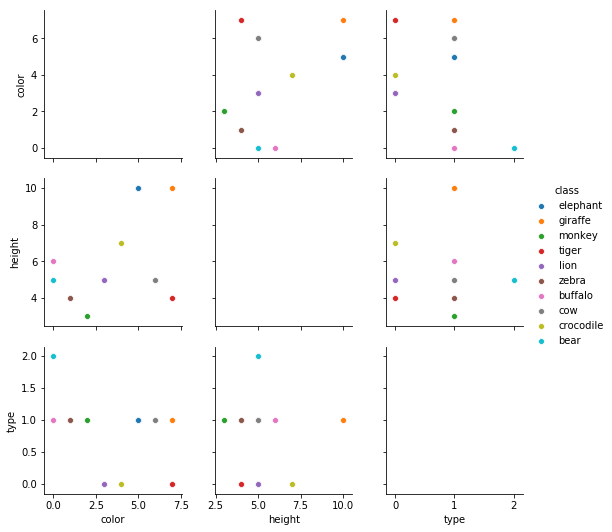

In [6]:
le= LabelEncoder()
df2=df.copy()
df2.color = le.fit_transform(df2.color)
df2.type= le.fit_transform(df2.type)
sns.pairplot(data = df2, hue= 'class')

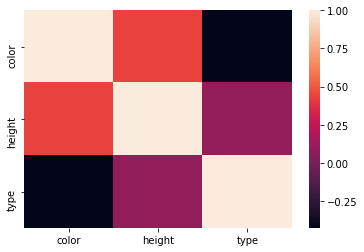

In [7]:
sns.heatmap(df2.corr())

In [8]:
target=df2['class']
df1 = df2.copy()
df1 = df1.drop('class', axis=1)
target

0      elephant
1       giraffe
2        monkey
3      elephant
4         tiger
5          lion
6         zebra
7       buffalo
8           cow
9     crocodile
10         bear
11     elephant
12      giraffe
13       monkey
14     elephant
15        tiger
16         lion
17        zebra
18      buffalo
19          cow
20    crocodile
21         bear
Name: class, dtype: object

In [9]:
X = df1
#lebel encoding
le = LabelEncoder()
target = le.fit_transform(target)
y = target
target

array([4, 5, 7, 4, 8, 6, 9, 1, 2, 3, 0, 4, 5, 7, 4, 8, 6, 9, 1, 2, 3, 0])

In [10]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('Training split input :', X_train.shape)
print('Testing split input :', X_test.shape)

Training split input : (17, 3)
Testing split input : (5, 3)


In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
#predicting the values of test data
y_pred = dtree.predict(X_test)
print('Classification report -\n',classification_report(y_test,y_pred))

Classification report -
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Text(0.5,1,'Accuracy Score : 1.0')

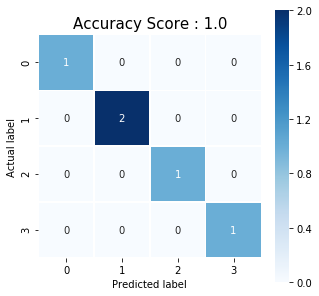

In [12]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title, size=15)